<a href="https://colab.research.google.com/github/bovo1/pet_chest_disease/blob/main/SEG_PHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
from PIL import Image, ImageDraw
import json
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.2/710.2 kB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install -U ultralytics "ray[tune]"
!pip install wandb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()
#os.chdir("/content/drive/MyDrive/PetHealth")
os.chdir("/content/drive/MyDrive/PetHealth/chest_disease/seg_data")
print(os.getcwd())

/content/drive/MyDrive/PetHealth/chest_disease/seg_data


In [ ]:
seg_model = YOLO('yolov8s-seg.yaml').load('yolov8s.pt')

Transferred 355/417 items from pretrained weights


In [ ]:
seg_model.tune(data='data.yaml', epochs=20, iterations=300, plots=False, save=False, val=False)

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#Polygon Check

In [ ]:
import glob
img_list = glob.glob('/content/drive/MyDrive/PetHealth/chest_disease/seg_data/validation/images/*.jpg')
txt_list = glob.glob('/content/drive/MyDrive/PetHealth/chest_disease/seg_data/validation/labels/*.txt')

In [ ]:
print(img_list[0])
print(img_list[11])

/content/drive/MyDrive/PetHealth/chest_disease/seg_data/validation/images/D_61_20160915_CM_0020_NOR_Ch03_20200404_0581.jpg
/content/drive/MyDrive/PetHealth/chest_disease/seg_data/validation/images/D_61_20160920_IF_0030_NOR_Ch02_20170920_0002.jpg


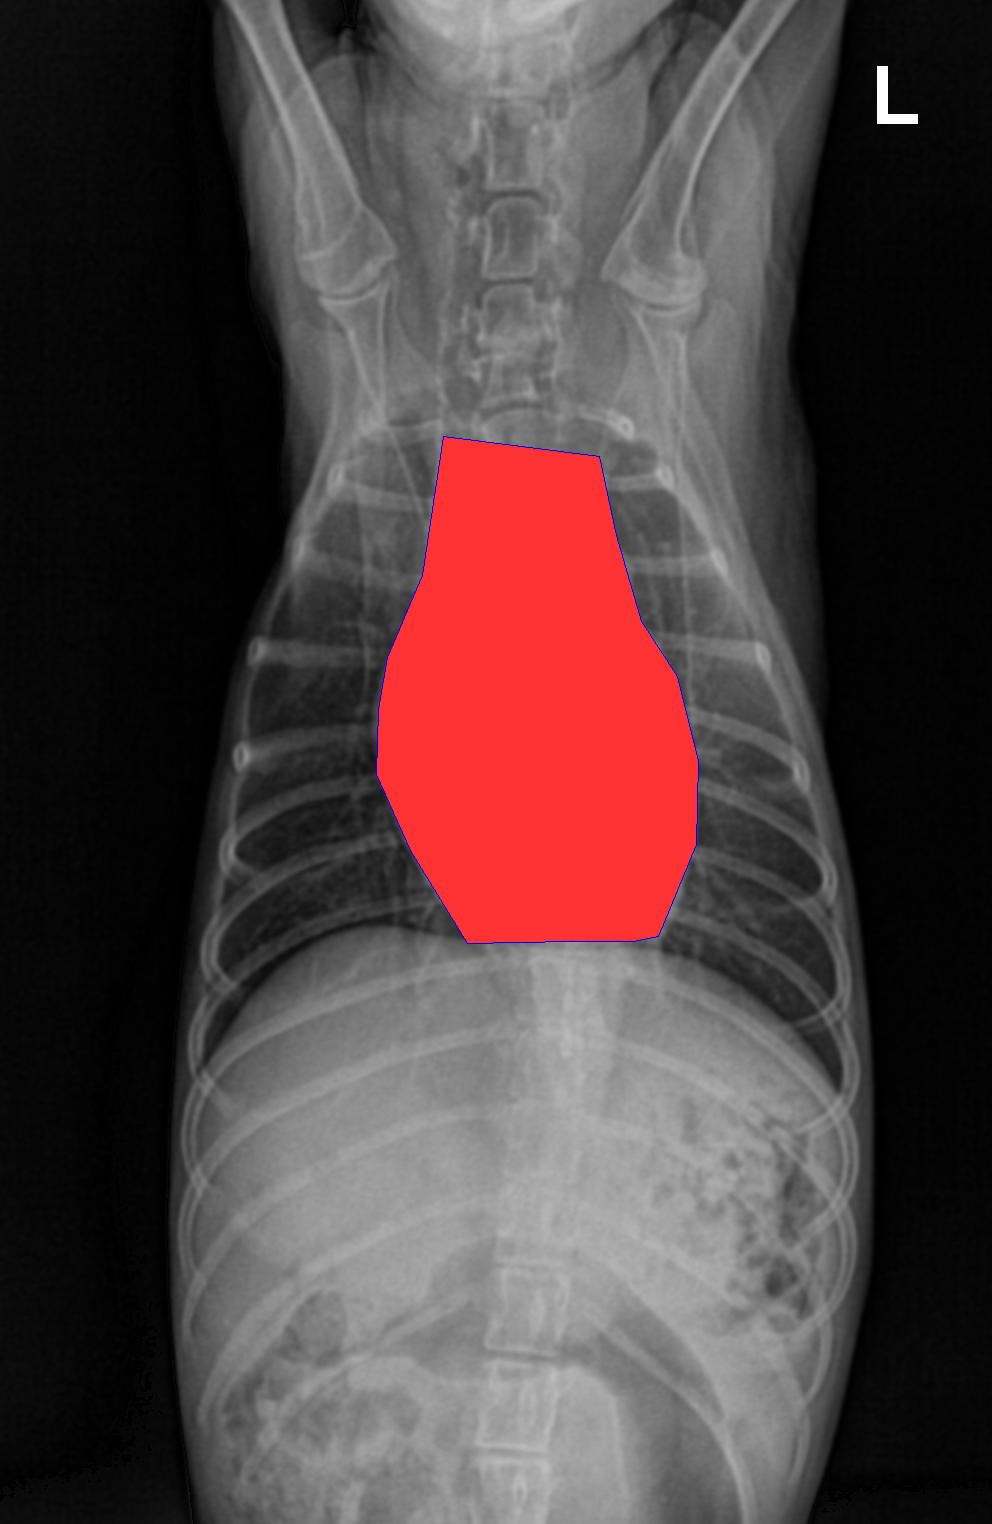

In [ ]:
err_img1 = Image.open('/content/drive/MyDrive/PetHealth/chest_disease/seg_data/images/train/D_61_19990805_IF_0028_NOR_Ch03_20211216_0108.jpg').convert('RGBA')
test_img_1_size = list(err_img1.size)
with open('/content/drive/MyDrive/PetHealth/chest_disease/seg_data/labels/train/D_61_19990805_IF_0028_NOR_Ch03_20211216_0108.txt', 'r') as f:
  txt1_data = f.read()
  txt1_data_str = txt1_data.split(' ')
img1_coord_list = txt1_data_str[1:]
img1_coord_list[-1] = img1_coord_list[-1][:-2]


img1_coord_list = [float(i) for i in img1_coord_list]

for i in range(0, len(img1_coord_list), 2):
  img1_coord_list[i] = img1_coord_list[i] * test_img_1_size[0]
for i in range(1, len(img1_coord_list), 2):
  img1_coord_list[i] = img1_coord_list[i] * test_img_1_size[1]

test_img = ImageDraw.Draw(err_img1, "RGBA")
test_img.polygon(img1_coord_list, fill ="#ff0000cc", outline ="blue")

err_img1

In [ ]:
test_img_1 = Image.open(img_list[0]).convert('RGBA')
test_img_1_size = list(test_img_1.size)
test_img_1_name = img_list[0].split('/')[-1]
test_img_1_name = os.path.splitext(test_img_1_name)[0]
test_img_2 = Image.open(img_list[11]).convert('RGBA')
test_img_2_size = list(test_img_2.size)
test_img_2_name = img_list[11].split('/')[-1]
test_img_2_name = os.path.splitext(test_img_2_name)[0]

txt1, txt2 = None, None

for i in txt_list:
  txt_name = i.split('/')[-1]
  txt_name = os.path.splitext(txt_name)[0]
  if txt_name == test_img_1_name:
    txt1 = i
  elif txt_name == test_img_2_name:
    txt2 = i


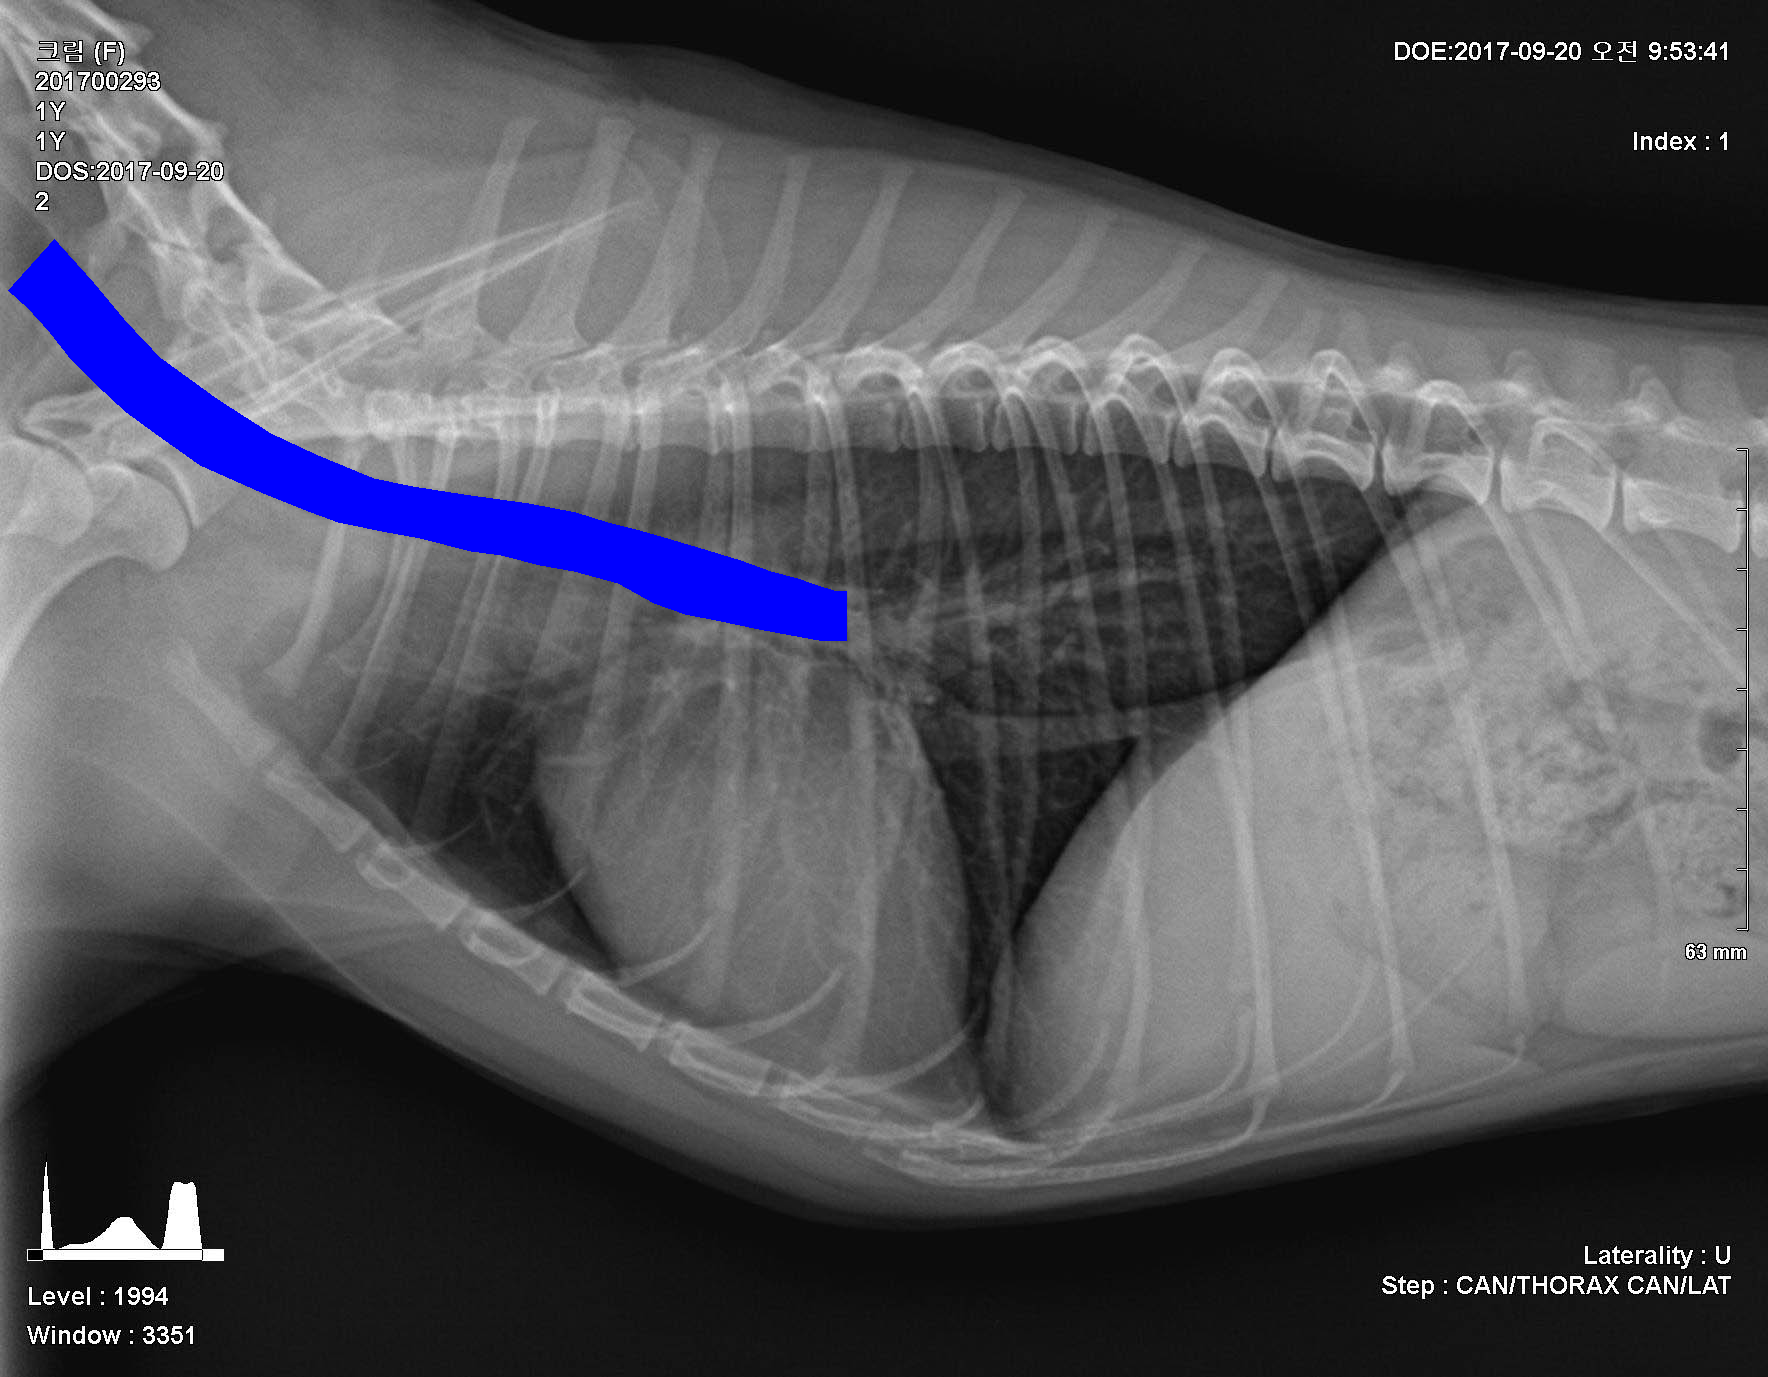

In [ ]:
txt1_x = []
txt1_y = []
txt2_x = []
txt2_y = []

with open(txt1, 'r') as f:
  txt1_data = f.read()
  txt1_data_str = txt1_data.split(' ')

  txt1_x = [txt1_data_str[td] for td in range(1, len(txt1_data_str), 2)]
  #print(txt1_data_str)
  txt1_y = [txt1_data_str[td] for td in range(2, len(txt1_data_str), 2)]

with open(txt2, 'r') as f:
  txt2_data = f.read()
  txt2_data_str = txt2_data.split(' ')

  txt2_x = [txt2_data_str[td] for td in range(1, len(txt2_data_str), 2)]
  #print(txt1_data_str)
  txt2_y = [txt2_data_str[td] for td in range(2, len(txt2_data_str), 2)]

img1_coord_list = txt1_data_str[1:]
img1_coord_list[-1] = img1_coord_list[-1][:-2]
img2_coord_list = txt2_data_str[1:]
img2_coord_list[-1] = img2_coord_list[-1][:-2]

img1_coord_list = [float(i) for i in img1_coord_list]
img2_coord_list = [float(i) for i in img2_coord_list]


for i in range(0, len(img1_coord_list), 2):
  img1_coord_list[i] = img1_coord_list[i] * test_img_1_size[0]
for i in range(1, len(img1_coord_list), 2):
  img1_coord_list[i] = img1_coord_list[i] * test_img_1_size[1]

for i in range(0, len(img2_coord_list), 2):
  img2_coord_list[i] = img2_coord_list[i] * test_img_2_size[0]
for i in range(1, len(img2_coord_list), 2):
  img2_coord_list[i] = img2_coord_list[i] * test_img_2_size[1]



test1 = ImageDraw.Draw(test_img_1, "RGBA")
test1.polygon(img1_coord_list, fill ="#ff0000cc", outline ="blue")


test2 = ImageDraw.Draw(test_img_2, "RGBA")
test2.polygon(img2_coord_list, fill='blue')

test_img_2

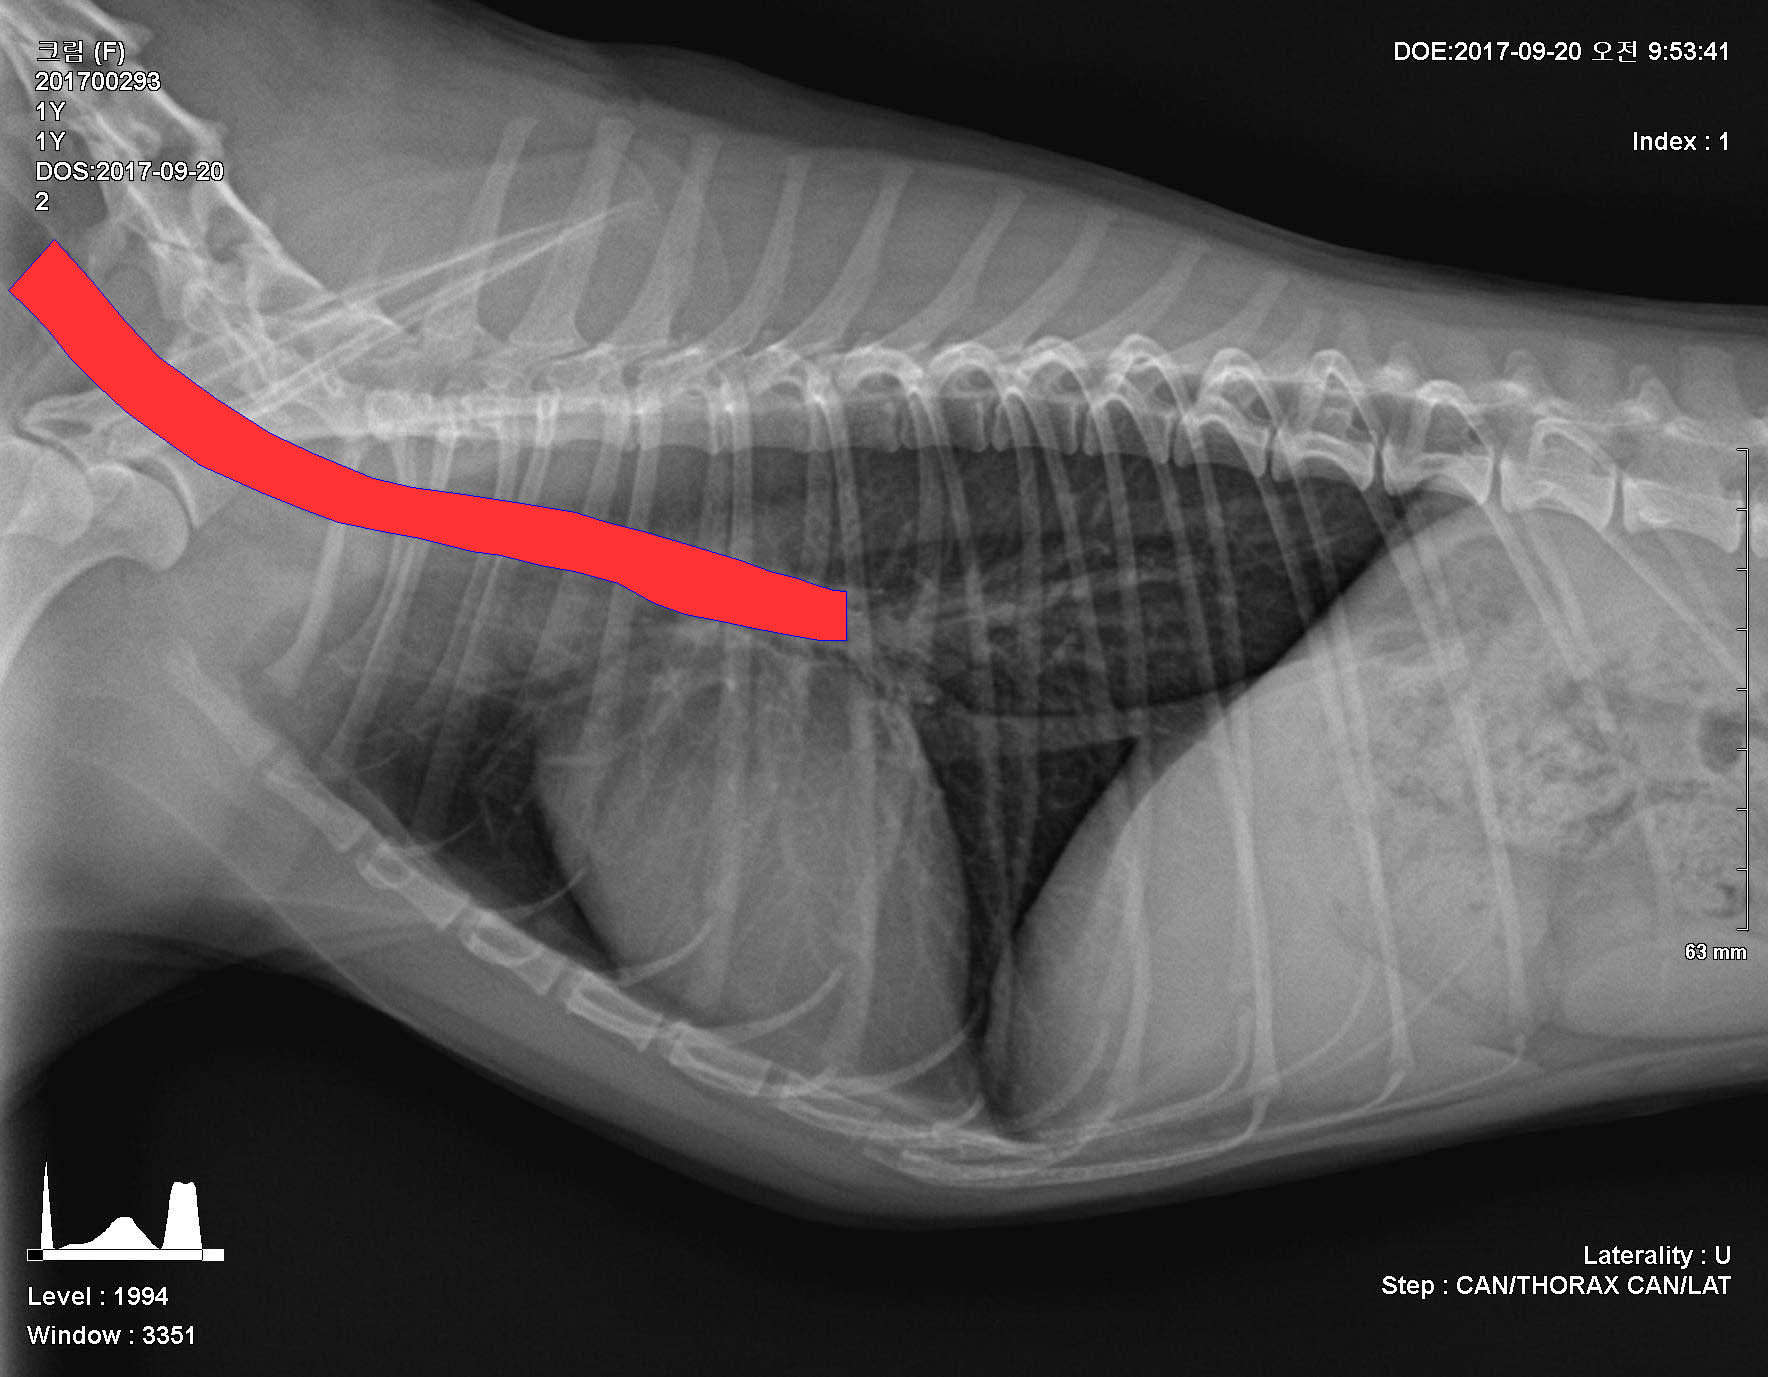

In [ ]:
with open('/content/D_61_20160920_IF_0030_NOR_Ch02_20170920_0002.json', 'r') as f:
  data = json.load(f)
coord_list = data['annotations'][0]['points']

coord_list = [(i[0], i[1]) for i in coord_list]

img = Image.open(img_list[11]).convert('RGBA')
test_img = ImageDraw.Draw(img, "RGBA")
test_img.polygon(coord_list, fill ="#ff0000cc", outline ="blue")

img

#Learning

In [ ]:
seg_model = YOLO('yolov8s-seg.yaml')

In [ ]:
import glob
img_list = glob.glob('/content/drive/MyDrive/PetHealth/chest_disease/seg_data/images/val/*.jpg')
txt_list = glob.glob('/content/drive/MyDrive/PetHealth/chest_disease/seg_data/labels/val/*.txt')

print(len(img_list), len(txt_list))

4592 4592


In [ ]:
seg_model.model

SegmentationModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
 

In [ ]:
beta_model = YOLO('/content/drive/MyDrive/PetHealth/chest_disease/seg_data/runs/segment/train4/weights/best.pt')

In [ ]:
results = beta_model.train(data='data.yaml', epochs=10, plots=True, pretrained=False, verbose=True, resume=True)

Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/PetHealth/chest_disease/seg_data/runs/segment/train4/weights/last.pt, data=data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

train: Scanning /content/drive/MyDrive/PetHealth/chest_disease/seg_data/labels/train.cache... 25518 images, 0 backgrounds, 1 corrupt: 100%|██████████| 25519/25519 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/PetHealth/chest_disease/seg_data/images/train/D_61_20030901_CM_0011_NOR_Ch03_20211213_0404.jpg: ignoring corrupt image/label: image file is truncated (75 bytes not processed)


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/PetHealth/chest_disease/seg_data/labels/val... 4592 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4592/4592 [12:14<00:00,  6.25it/s]


val: New cache created: /content/drive/MyDrive/PetHealth/chest_disease/seg_data/labels/val.cache
Plotting labels to runs/segment/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Resuming training from /content/drive/MyDrive/PetHealth/chest_disease/seg_data/runs/segment/train4/weights/last.pt from epoch 4 to 10 total epochs
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train4
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss 

       4/10      4.75G      0.991     0.9042      1.024      1.478         14        640: 100%|██████████| 1595/1595 [06:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:56<00:00,  2.56it/s]

                   all       4592       4592      0.385      0.626      0.393      0.294      0.384      0.624      0.392      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10       4.8G     0.9647      0.873     0.9826      1.446         14        640: 100%|██████████| 1595/1595 [06:11<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:55<00:00,  2.58it/s]

                   all       4592       4592      0.411      0.678      0.442      0.326      0.411      0.678      0.442      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.79G     0.9386     0.8482     0.9321      1.418         14        640: 100%|██████████| 1595/1595 [06:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:55<00:00,  2.60it/s]

                   all       4592       4592      0.442      0.666      0.473      0.357      0.442      0.666      0.473      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.77G     0.9107     0.8298     0.8972       1.39         14        640: 100%|██████████| 1595/1595 [06:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:55<00:00,  2.62it/s]


                   all       4592       4592      0.428      0.752      0.508      0.378      0.429       0.75      0.508      0.369

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.79G     0.8935     0.8147     0.8691      1.377         14        640: 100%|██████████| 1595/1595 [06:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:55<00:00,  2.61it/s]

                   all       4592       4592      0.496      0.676      0.505      0.383      0.495      0.674      0.504      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.79G     0.8713     0.8013     0.8453      1.357         14        640: 100%|██████████| 1595/1595 [06:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:53<00:00,  2.69it/s]


                   all       4592       4592      0.489      0.695      0.513      0.388      0.489      0.695      0.513      0.374

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.78G     0.8547     0.7875     0.8235      1.341         14        640: 100%|██████████| 1595/1595 [05:55<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:52<00:00,  2.72it/s]


                   all       4592       4592      0.455      0.741      0.528      0.404      0.455       0.74      0.527      0.386

7 epochs completed in 0.826 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 23.8MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:53<00:00,  2.68it/s]


                   all       4592       4592      0.456      0.741      0.528      0.404      0.455      0.738      0.527      0.386
              NOR_Ch01       4592       1178      0.485      0.593      0.477      0.394      0.485      0.589      0.477      0.393
              ABN_Ch01       4592         81      0.133      0.506      0.173      0.138      0.134      0.506      0.173      0.143
              NOR_Ch02       4592       1114      0.465      0.965      0.503      0.364      0.465      0.963      0.502      0.335
              ABN_Ch02       4592        127      0.257      0.858      0.592      0.384      0.255       0.85      0.585      0.302
              NOR_Ch03       4592       2054      0.979      0.999      0.993      0.834      0.979      0.999      0.993       0.84
              ABN_Ch03       4592         38      0.415      0.526      0.431      0.312      0.415      0.523      0.431      0.304
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.2ms postproce

In [ ]:
metrics = beta_model.val()
metrics.box.maps

Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs


val: Scanning /content/drive/MyDrive/PetHealth/chest_disease/seg_data/labels/val.cache... 4592 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4592/4592 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 287/287 [01:46<00:00,  2.69it/s]


                   all       4592       4592      0.456      0.737      0.528      0.404      0.455      0.736      0.527      0.386
              NOR_Ch01       4592       1178      0.486      0.587      0.478      0.395      0.486      0.587      0.478      0.394
              ABN_Ch01       4592         81      0.136        0.5      0.173      0.137      0.136        0.5      0.173      0.143
              NOR_Ch02       4592       1114      0.464      0.964      0.501      0.363      0.464      0.963      0.501      0.334
              ABN_Ch02       4592        127      0.257      0.858      0.592      0.384      0.254       0.85      0.585      0.304
              NOR_Ch03       4592       2054      0.979      0.999      0.993      0.834      0.979      0.999      0.993       0.84
              ABN_Ch03       4592         38      0.412      0.517      0.431      0.312      0.412      0.517      0.431      0.304
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 1.2ms postproce

array([    0.39519,     0.13698,     0.36325,     0.38377,     0.83437,       0.312])

#Gradio

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
from ultralytics import ASSETS

model = YOLO('/content/drive/MyDrive/PetHealth/chest_disease/seg_data/runs/segment/train4/weights/best.pt')


def predict_image(img, conf_threshold, iou_threshold):
    results = model.predict(
        source=img,
        conf=conf_threshold,
        iou=iou_threshold,
        show_labels=True,
        show_conf=True,
    )

    for r in results:
        im_array = r.plot()
        im = Image.fromarray(im_array[..., ::-1])

    return im


iface = gr.Interface(
    fn=predict_image,
    inputs=[
        gr.Image(type="pil", label="Upload Image"),
        gr.Slider(minimum=0, maximum=1, value=0.25, label="Confidence threshold"),
        gr.Slider(minimum=0, maximum=1, value=0.45, label="IoU threshold")
    ],
    outputs=gr.Image(type="pil", label="Result"),
    title="Pet_Chest_Health",
)

if __name__ == '__main__':
    iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6111fad6f45689c77f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
